In [1]:
import papermill as pm
import scrapbook as sb
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os

C:\Users\William\Anaconda3\envs\HW4\lib\site-packages\papermill\iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [2]:
run_dates = [(datetime(2021, 12, 15) - timedelta(days=14))]
connection_string = 'sqlite:///data.db'
run_dates

[datetime.datetime(2021, 12, 1, 0, 0)]

In [3]:
prices = pd.read_sql(f'''
SELECT 
    * 
FROM ohlc 
''', connection_string)
tokens = np.unique(prices['token'].values)
tokens

array(['AAVE', 'ADA', 'ATOM', 'AVAX', 'BTC', 'COMP', 'CRV', 'DOT', 'ETH',
       'SOL', 'USDT'], dtype=object)

In [4]:
prices.iloc[-1:] #last date

,ts,open,high,low,close,volume,volumeUSD,token,chain
11626,2021-12-15 00:00:00,185.07,185.78,184.5,184.89,335.307,62142.63926,COMP,ETH


In [5]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [6]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=14)}', end='\r')
        res = pm.execute_notebook(
            'hw_4_yiyang_song.ipynb',
            f'{base_output_folder}/market_analysis_{token}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=14)}',
                'token': token,
                'connection_string': connection_string,
            }
        )

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

Executing:   0%|          | 0/13 [00:00<?, ?cell/s]

In [7]:
nb = sb.read_notebook('outputs/market_analysis_BTC.ipynb')

In [8]:
nb.scraps['prices'].data

,open,high,low,close,volume,volumeUSD,token,chain,volatility,return,dd,max_dd
ts,,,,,,,,,,,,
2021-12-01 00:00:00,57321.41,57451.05,56814.34,56987.97,388.482022,2.218430e+07,BTC,BTC,NaN,NaN,NaN,NaN
2021-12-01 01:00:00,56998.35,57726.45,56705.06,57616.41,599.791578,3.437153e+07,BTC,BTC,NaN,0.011028,0.000000,0.000000
2021-12-01 02:00:00,57618.55,57620.00,56972.97,57030.83,591.687200,3.387067e+07,BTC,BTC,NaN,-0.010163,-0.010163,-0.010163
2021-12-01 03:00:00,57029.79,57396.87,56841.01,57307.59,702.560364,4.007816e+07,BTC,BTC,NaN,0.004853,-0.005360,-0.010163
2021-12-01 04:00:00,57306.55,57456.82,57026.11,57404.01,859.591535,4.920503e+07,BTC,BTC,NaN,0.001682,-0.003686,-0.010163
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-14 20:00:00,46658.23,47086.98,46649.03,46877.70,783.748050,3.677161e+07,BTC,BTC,0.136358,0.004810,-0.200917,-0.205844
2021-12-14 21:00:00,46875.95,47890.62,46856.37,47805.73,1634.610294,7.759534e+07,BTC,BTC,0.142237,0.019797,-0.185098,-0.205844
2021-12-14 22:00:00,47805.73,48686.91,47773.01,48303.57,1804.082095,8.714276e+07,BTC,BTC,0.151148,0.010414,-0.176612,-0.205844


In [9]:
nbs = sb.read_notebooks('outputs')

In [10]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'return': scrap['prices'].data['return'].mean(),
        'volatility': scrap['prices'].data['volatility'].mean(),
        'max_dd': np.nanmin(scrap['prices'].data['max_dd']),
        'range': scrap['prices'].data['close'][-1] - scrap['prices'].data['close'][0]
    }) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,return,volatility,max_dd,range
0,AAVE,2021-12-01 00:00:00,2021-12-15 00:00:00,-1.176142e-03,0.216058,-0.404689,-88.0380
1,ADA,2021-12-01 00:00:00,2021-12-15 00:00:00,-5.503934e-04,0.224460,-0.313680,-0.2947
2,ATOM,2021-12-01 00:00:00,2021-12-15 00:00:00,-5.803702e-04,0.303160,-0.358851,-5.8980
3,AVAX,2021-12-01 00:00:00,2021-12-15 00:00:00,-8.629919e-04,0.283811,-0.394209,-34.6600
4,BTC,2021-12-01 00:00:00,2021-12-15 00:00:00,-4.655788e-04,0.157194,-0.205844,-8768.8800
5,COMP,2021-12-01 00:00:00,2021-12-15 00:00:00,-1.134608e-03,0.234760,-0.378144,-93.8100
6,CRV,2021-12-01 00:00:00,2021-12-15 00:00:00,-1.011807e-03,0.324475,-0.394862,-1.6395
7,DOT,2021-12-01 00:00:00,2021-12-15 00:00:00,-1.030542e-03,0.248260,-0.348681,-11.9520
8,ETH,2021-12-01 00:00:00,2021-12-15 00:00:00,-5.213618e-04,0.177147,-0.218952,-796.9200
9,SOL,2021-12-01 00:00:00,2021-12-15 00:00:00,-7.191010e-04,0.248466,-0.373707,-49.3260


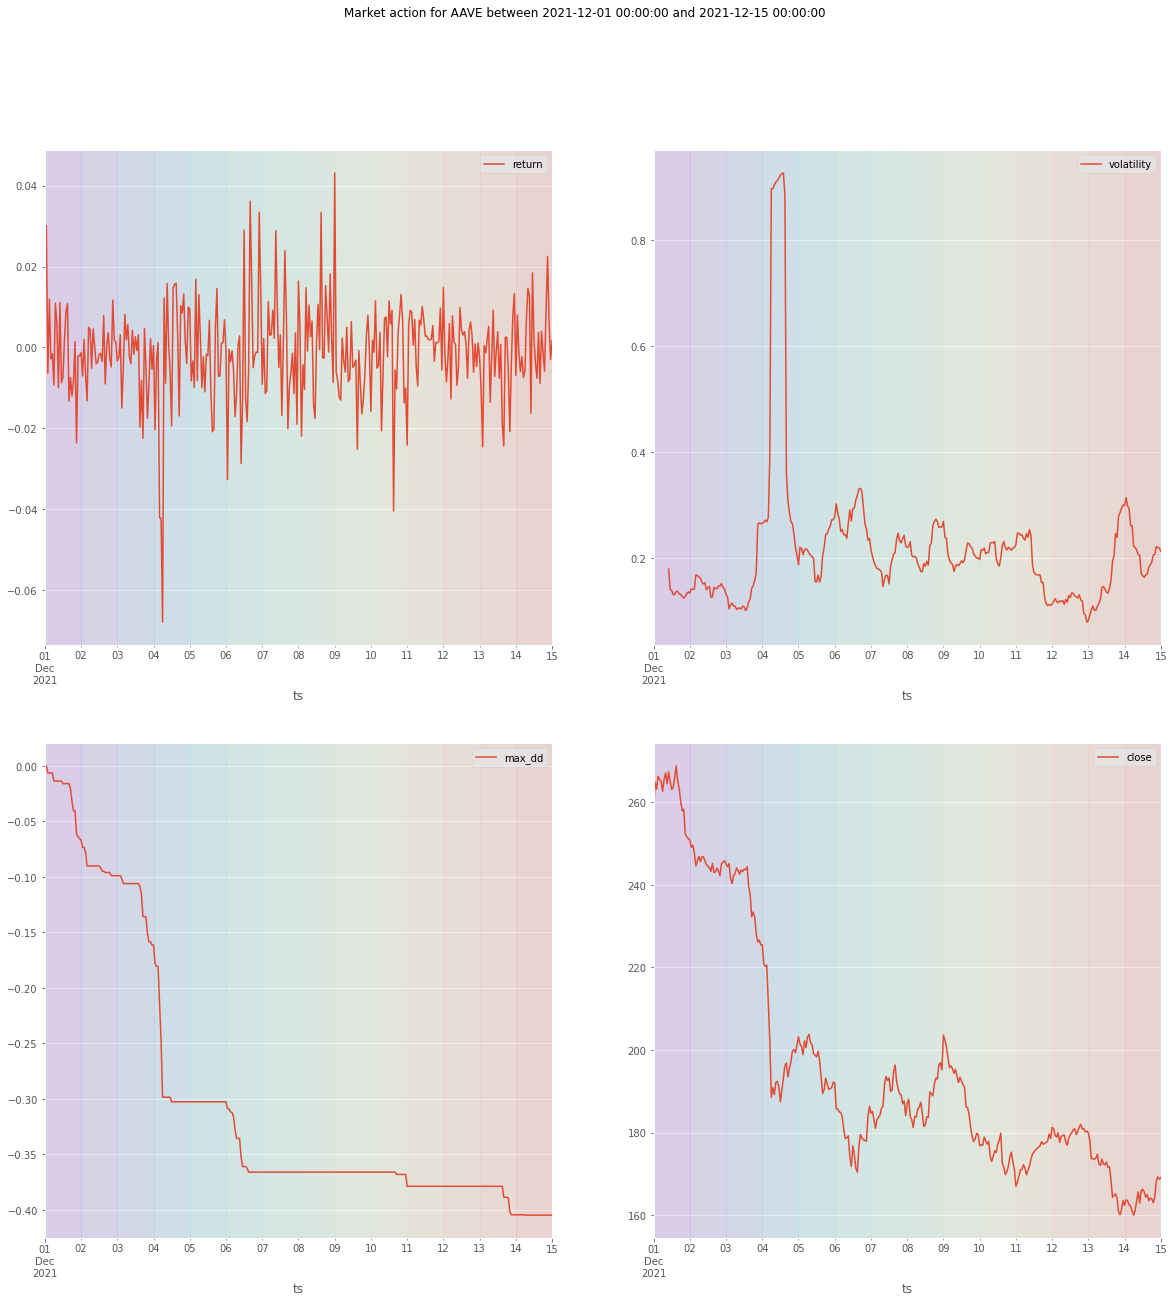

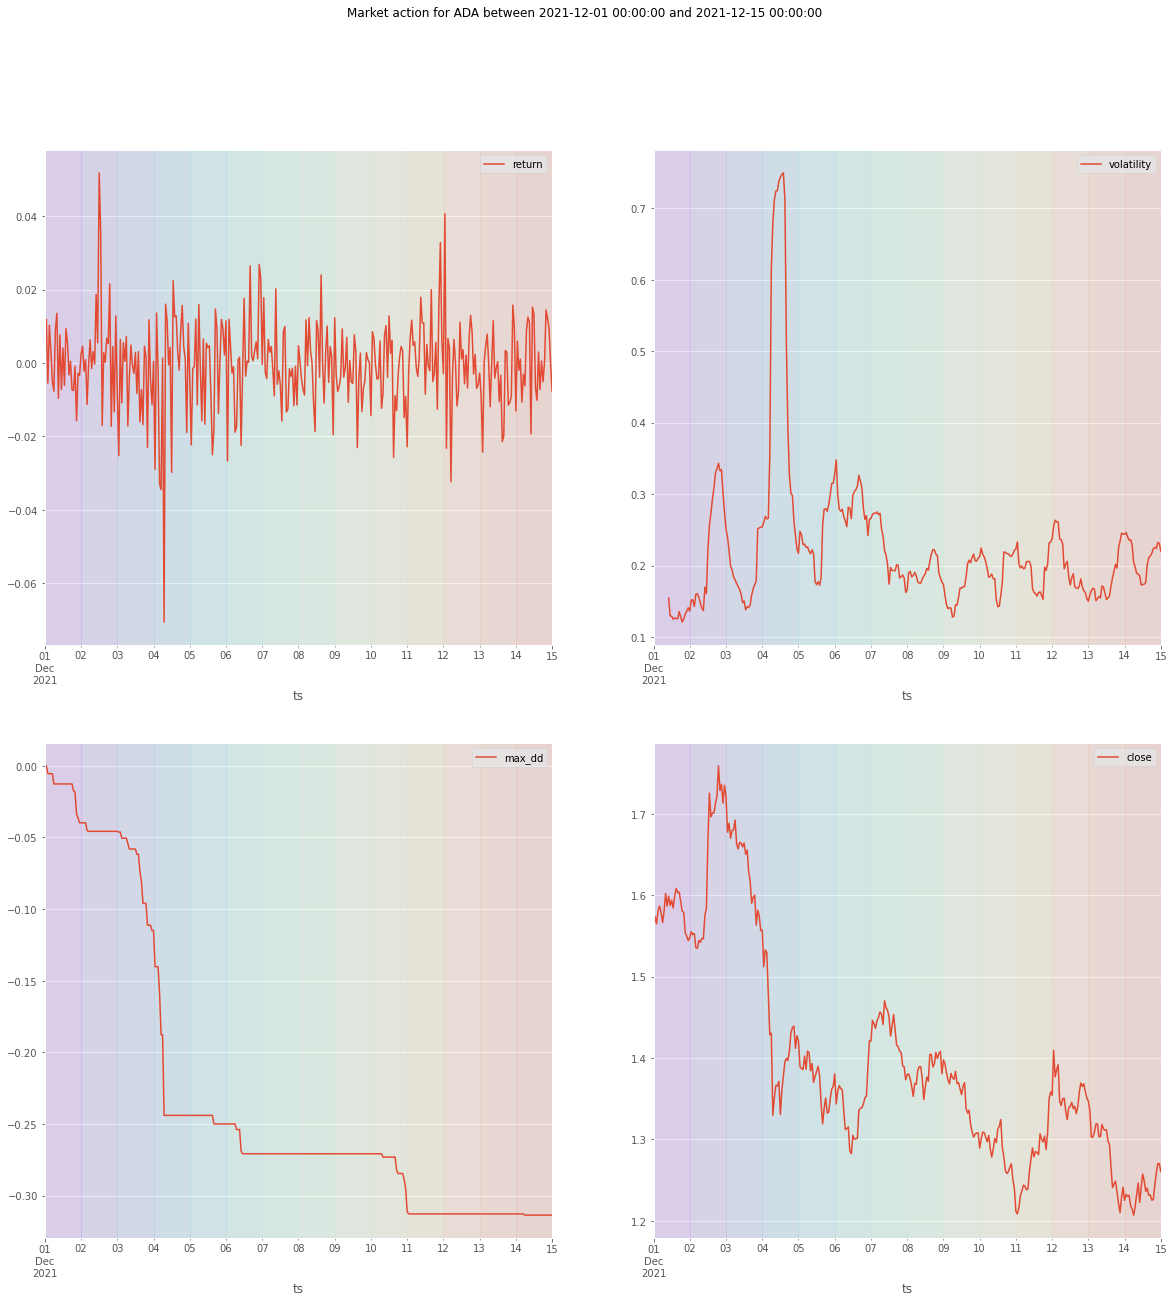

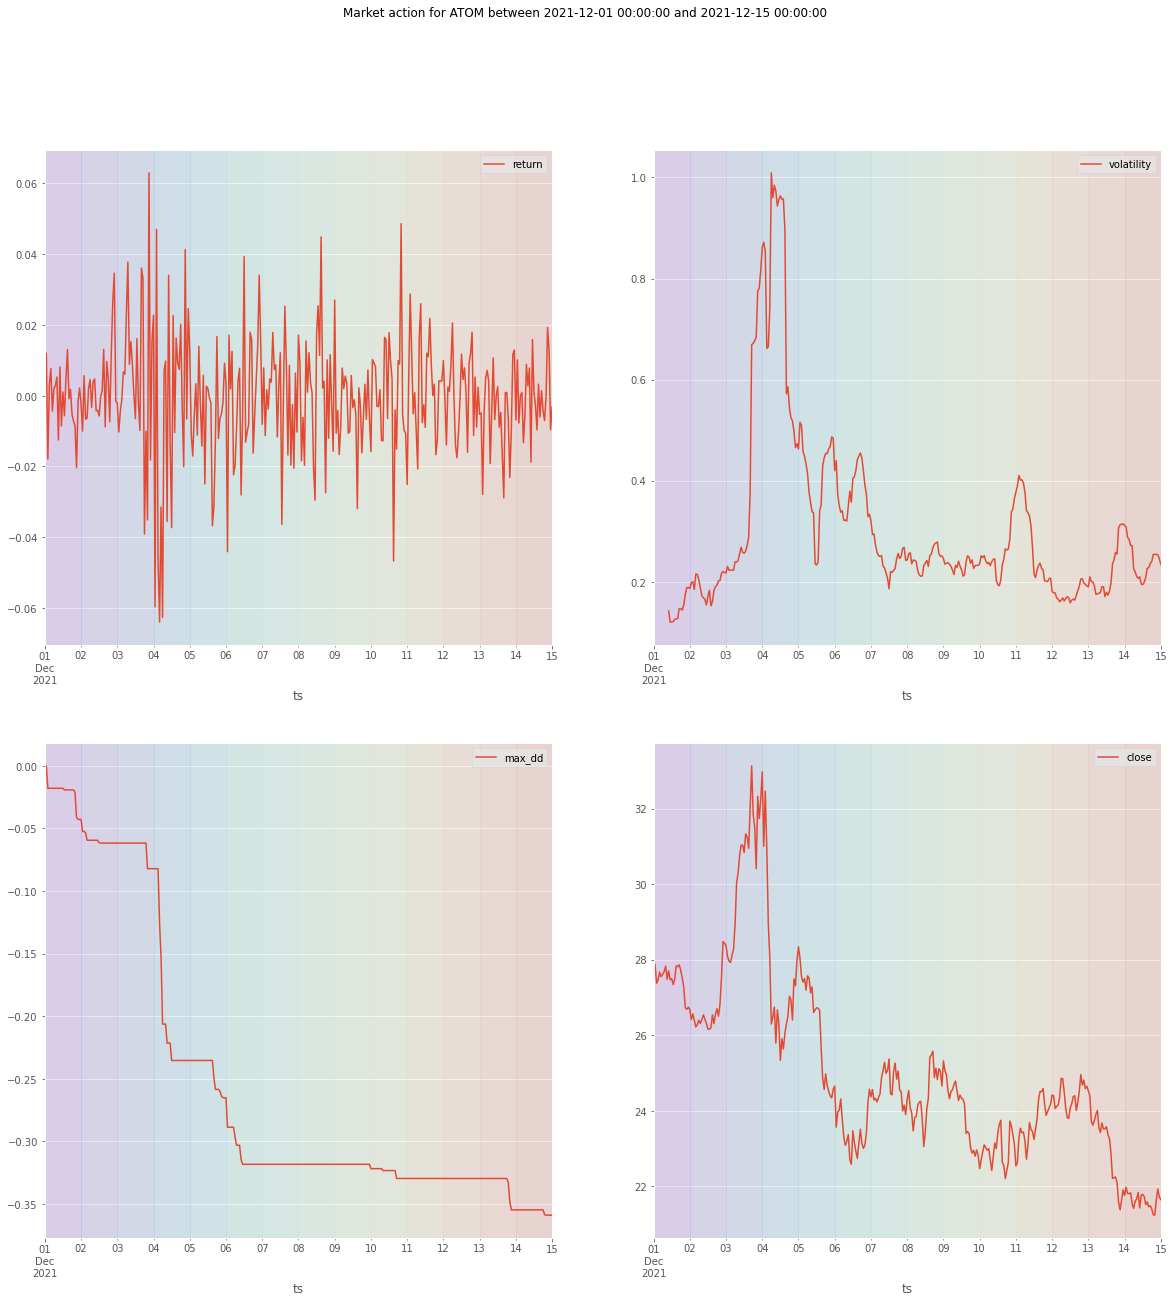

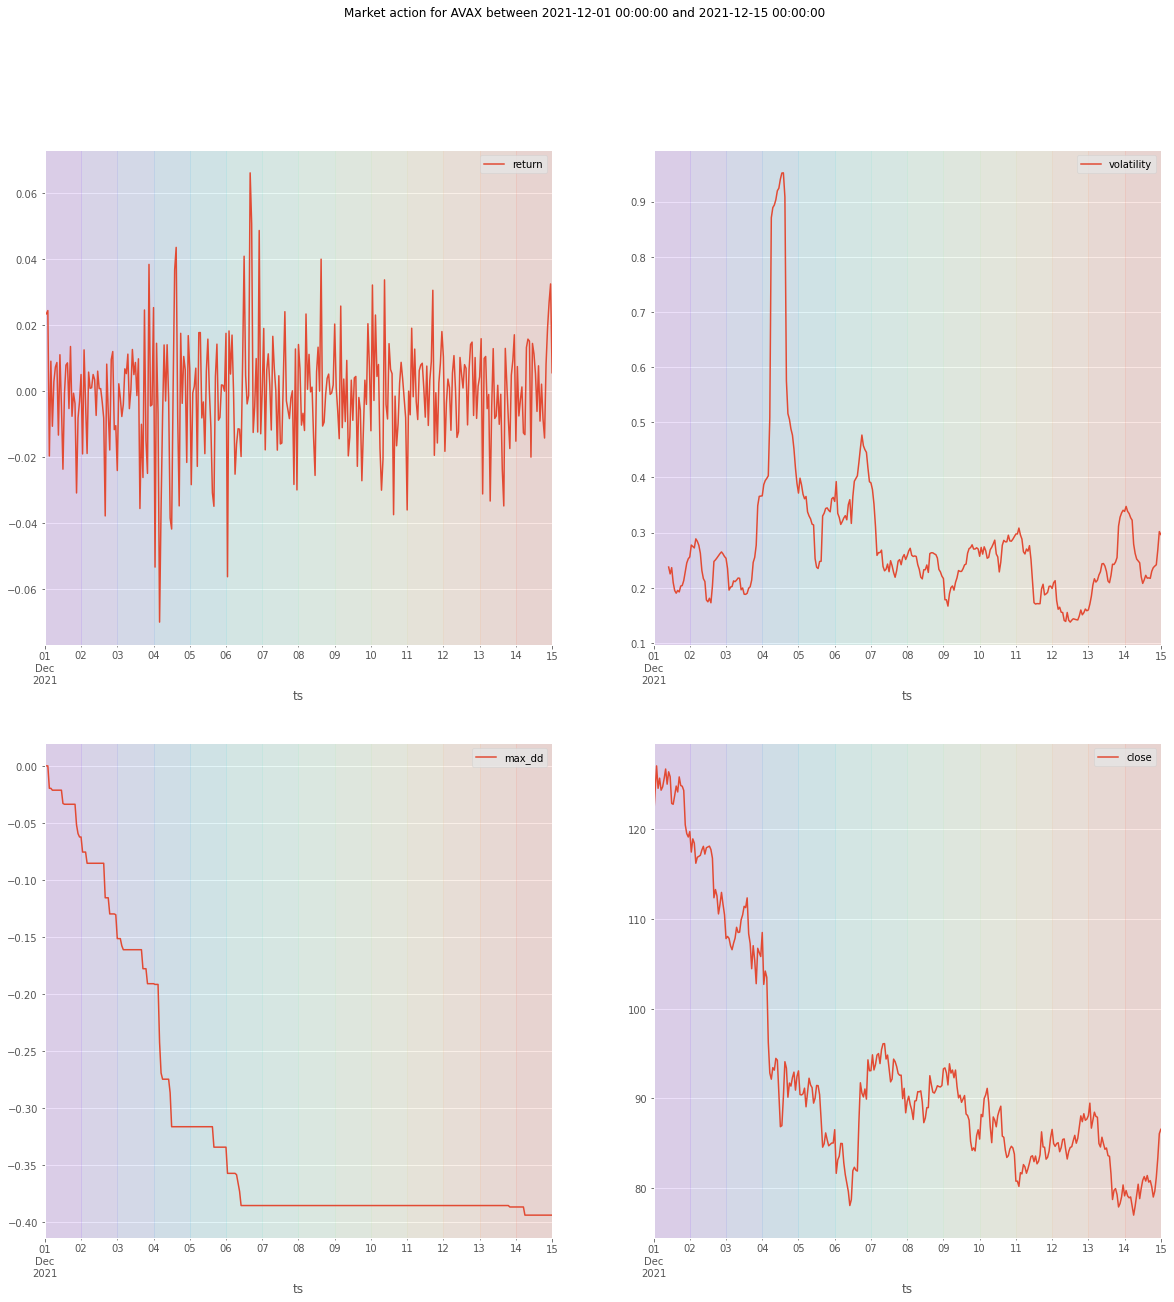

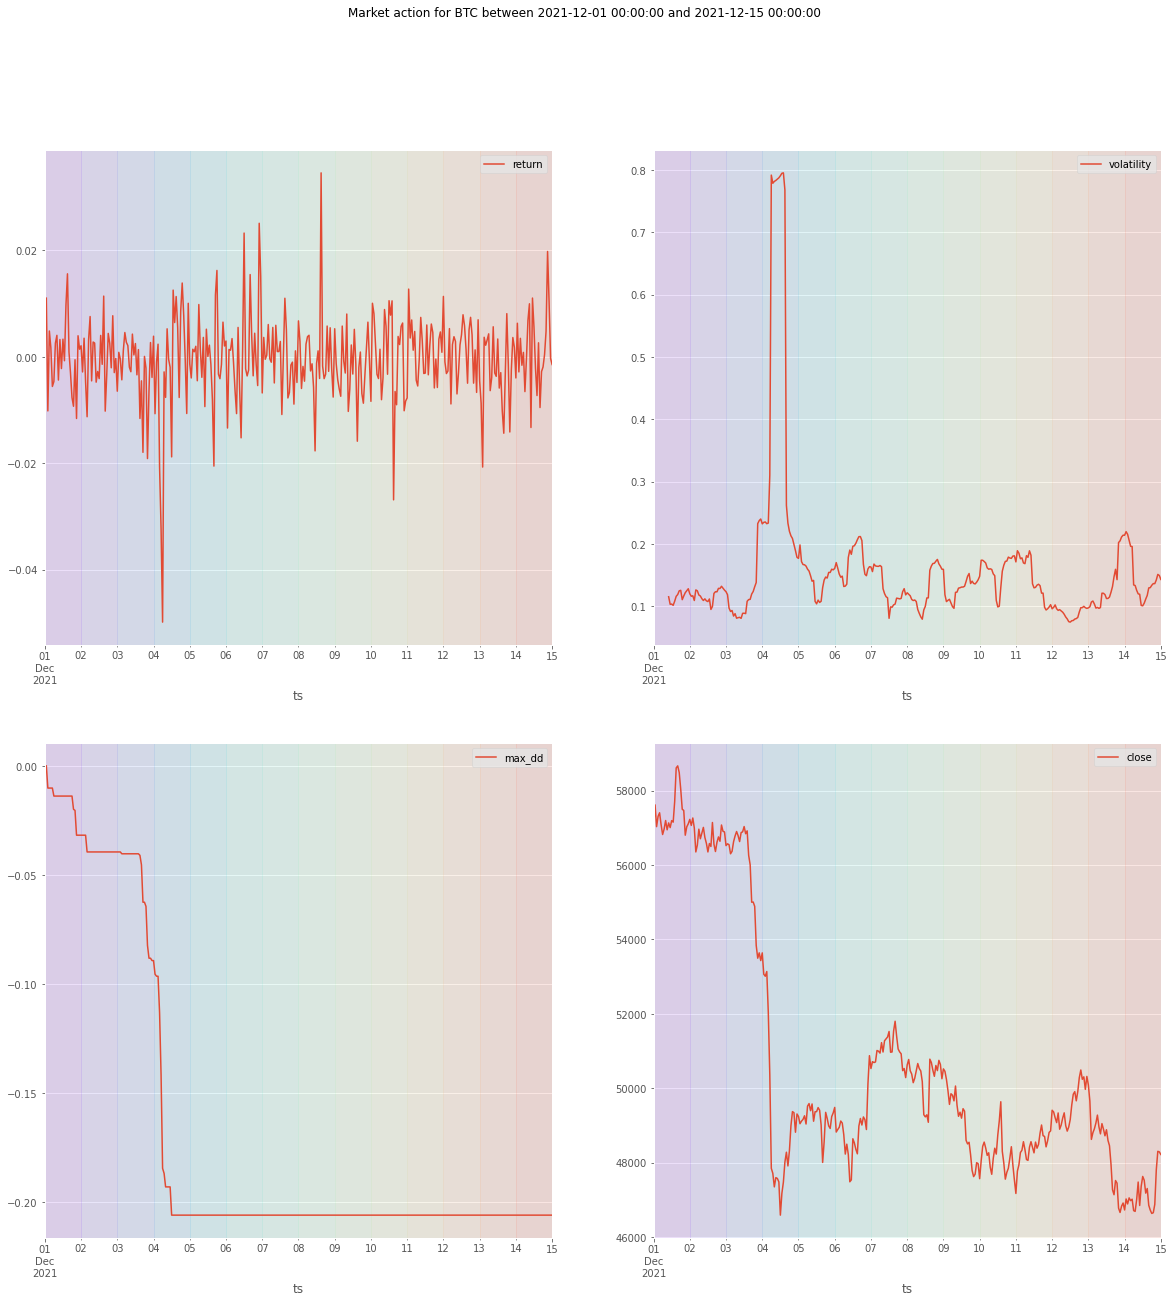

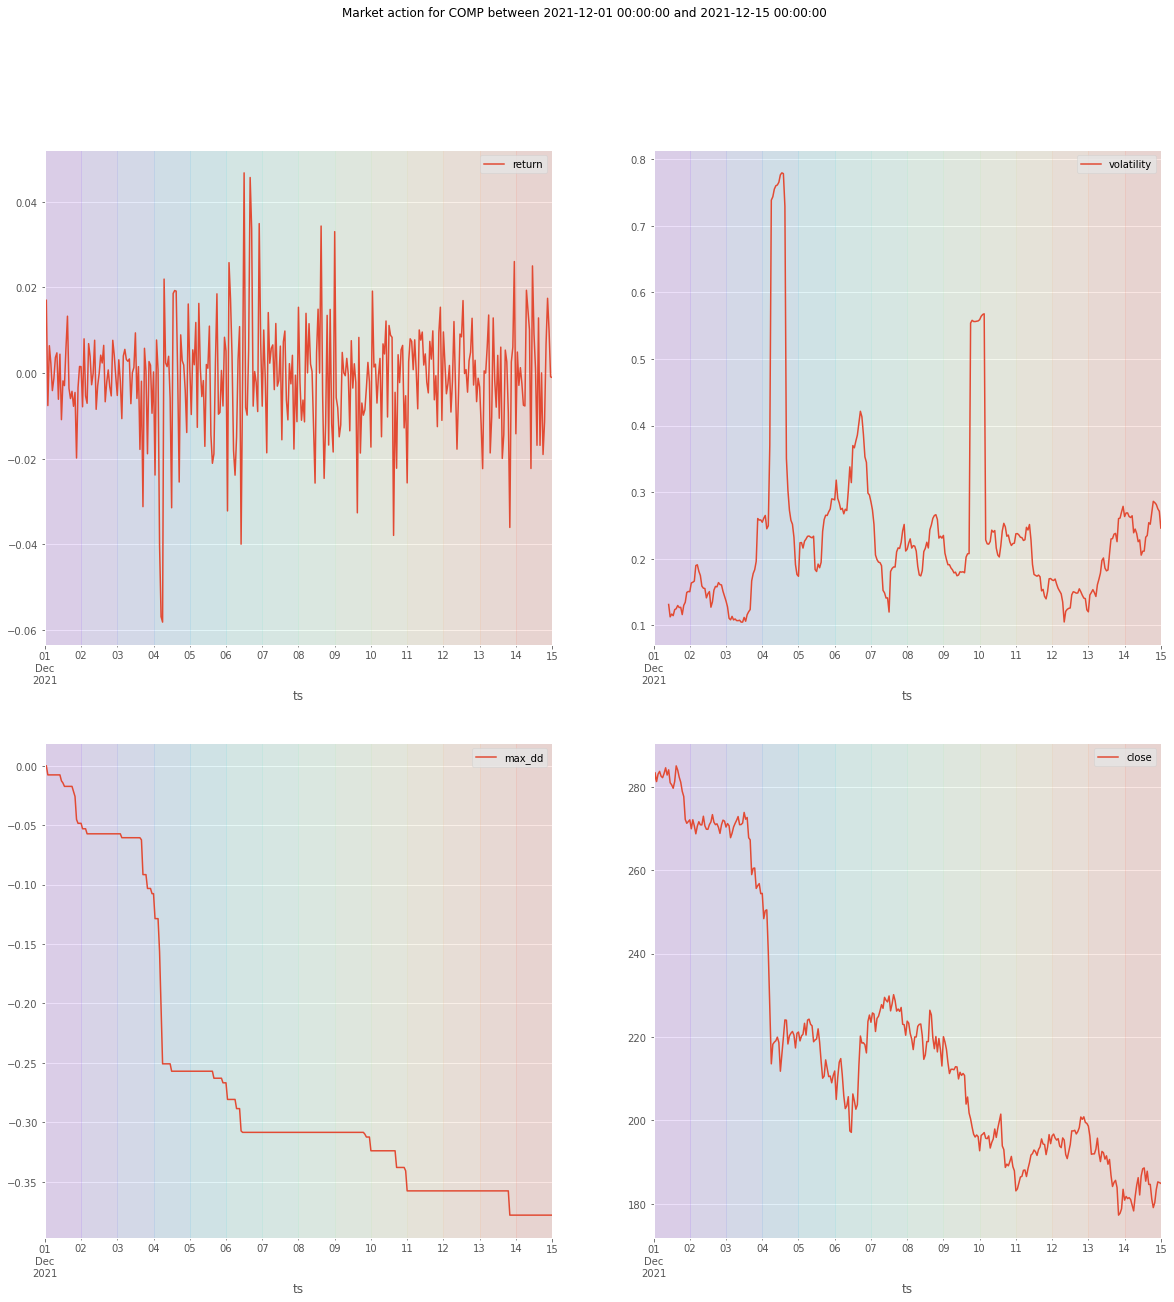

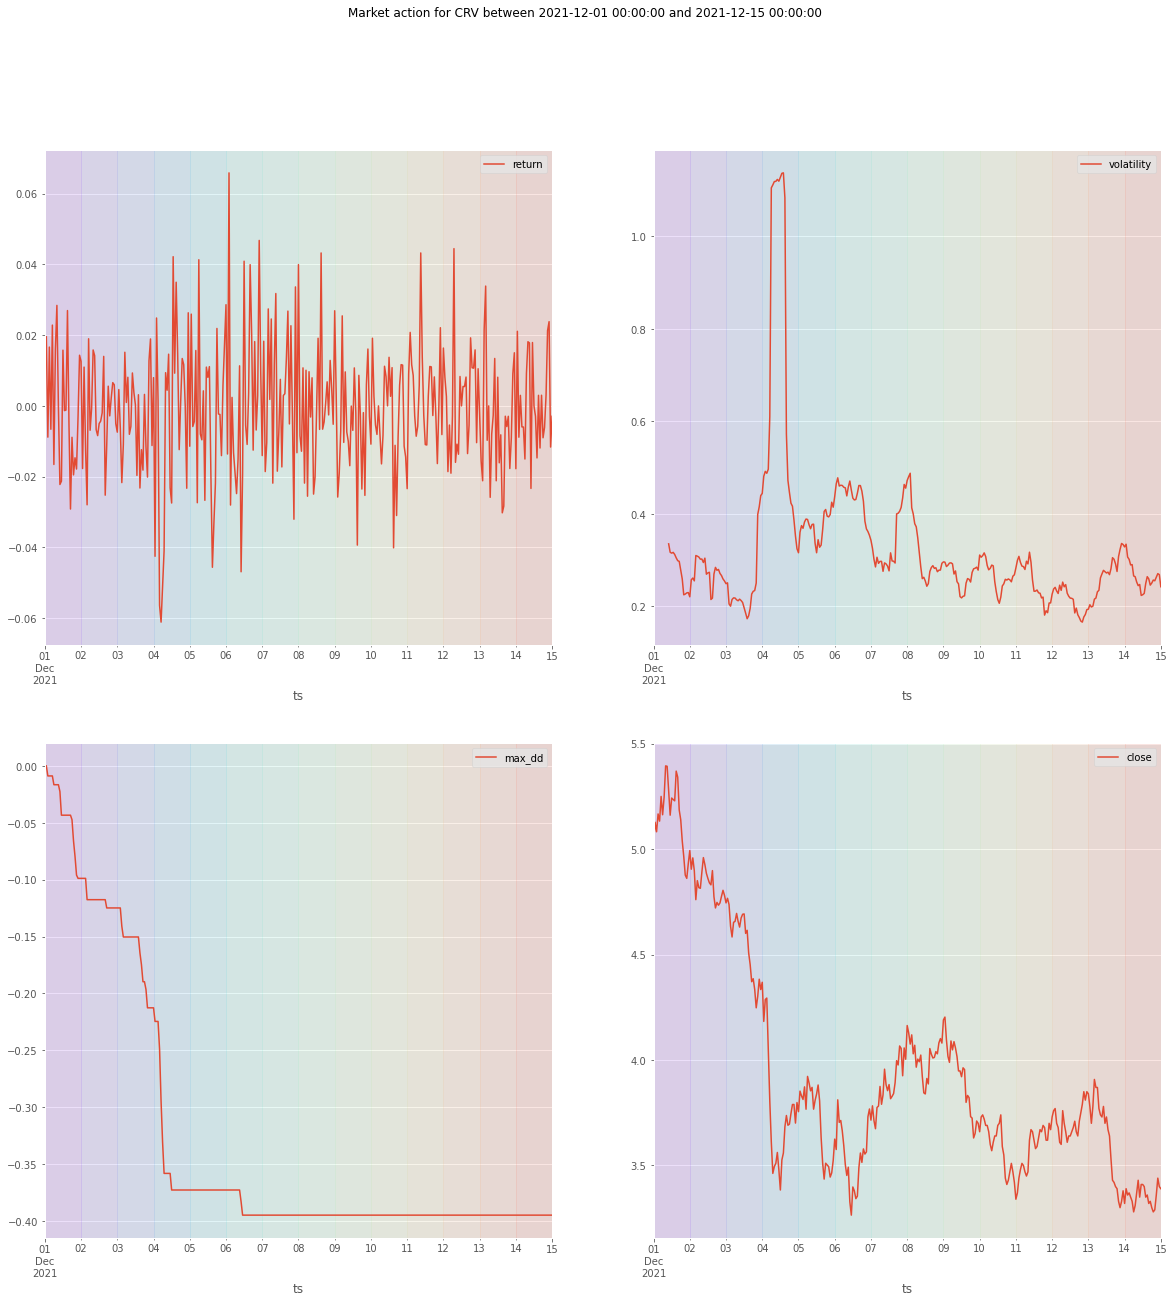

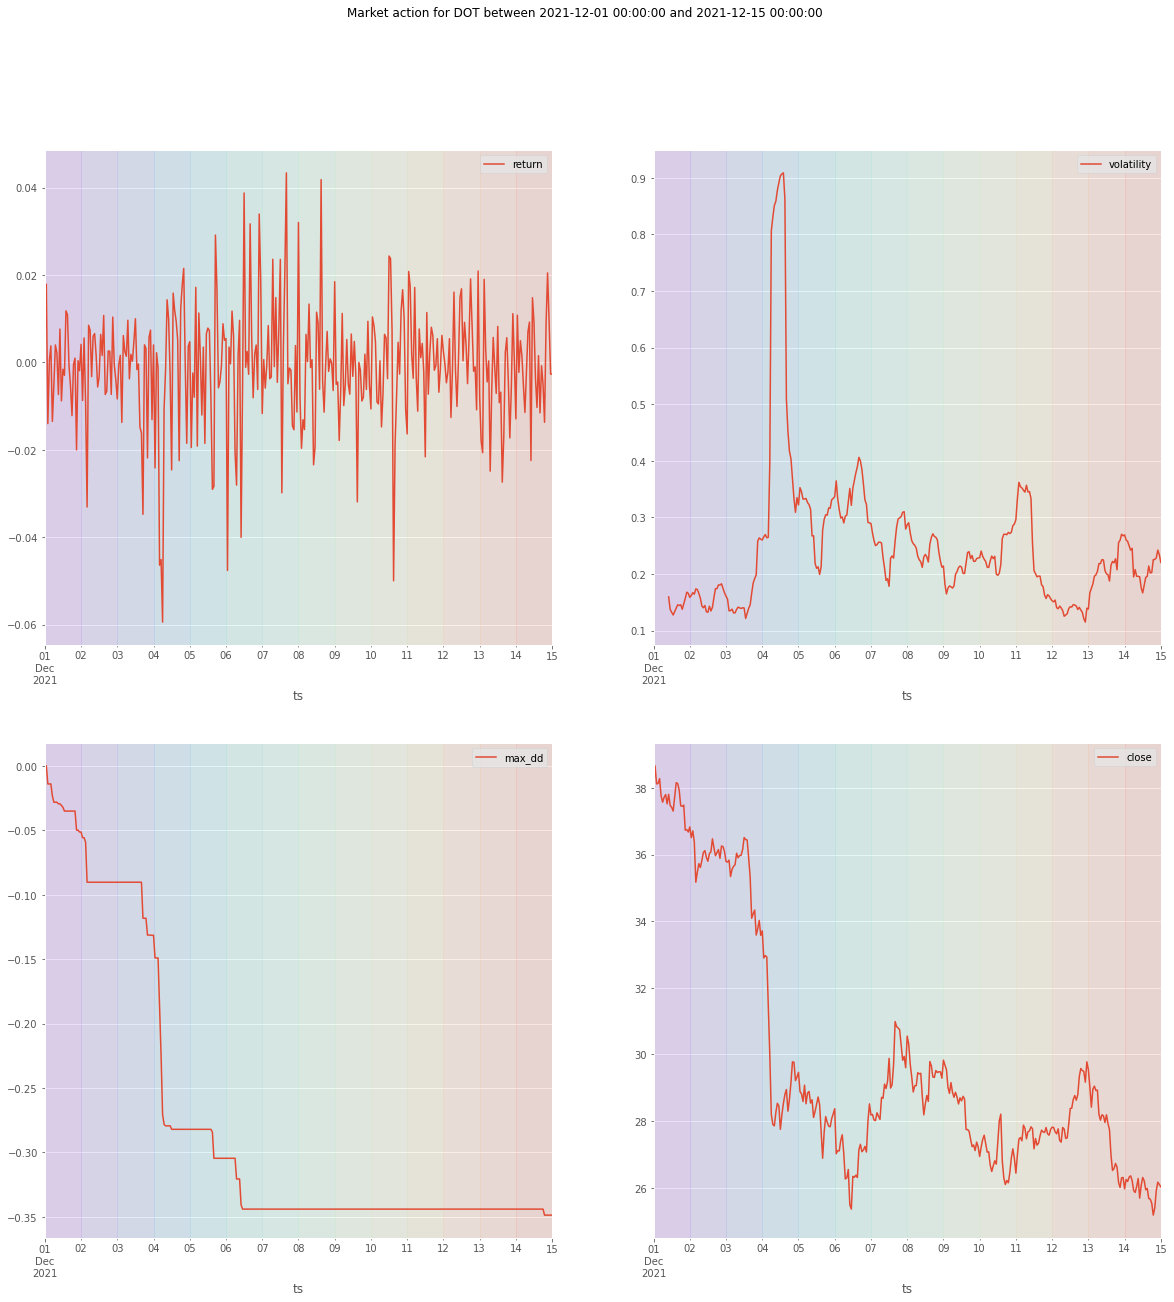

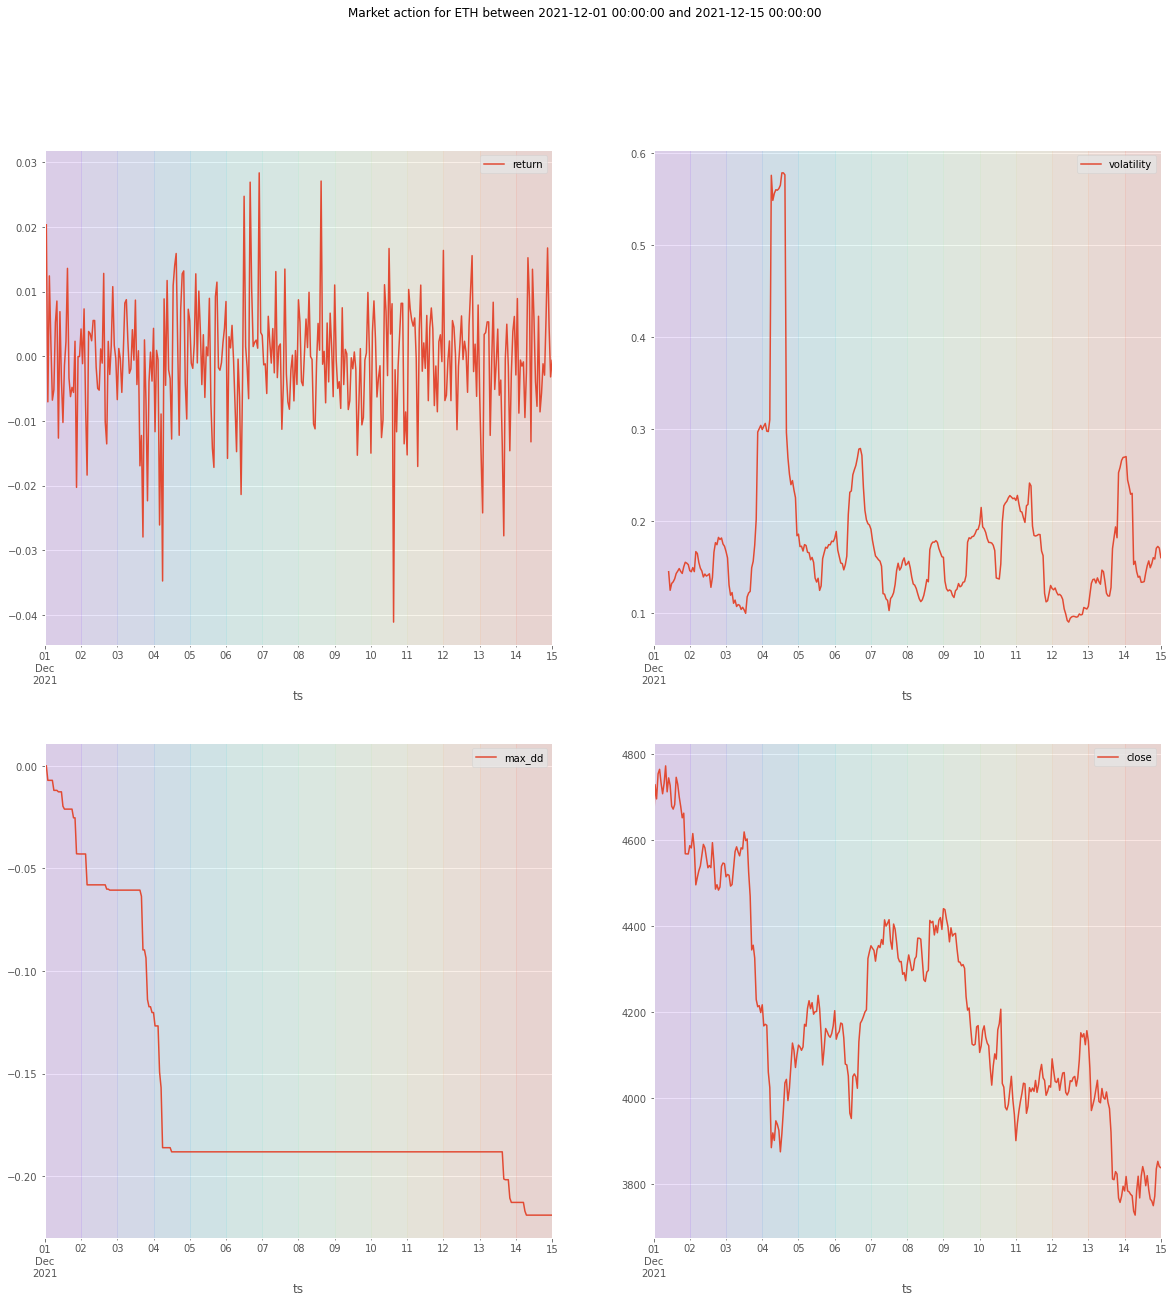

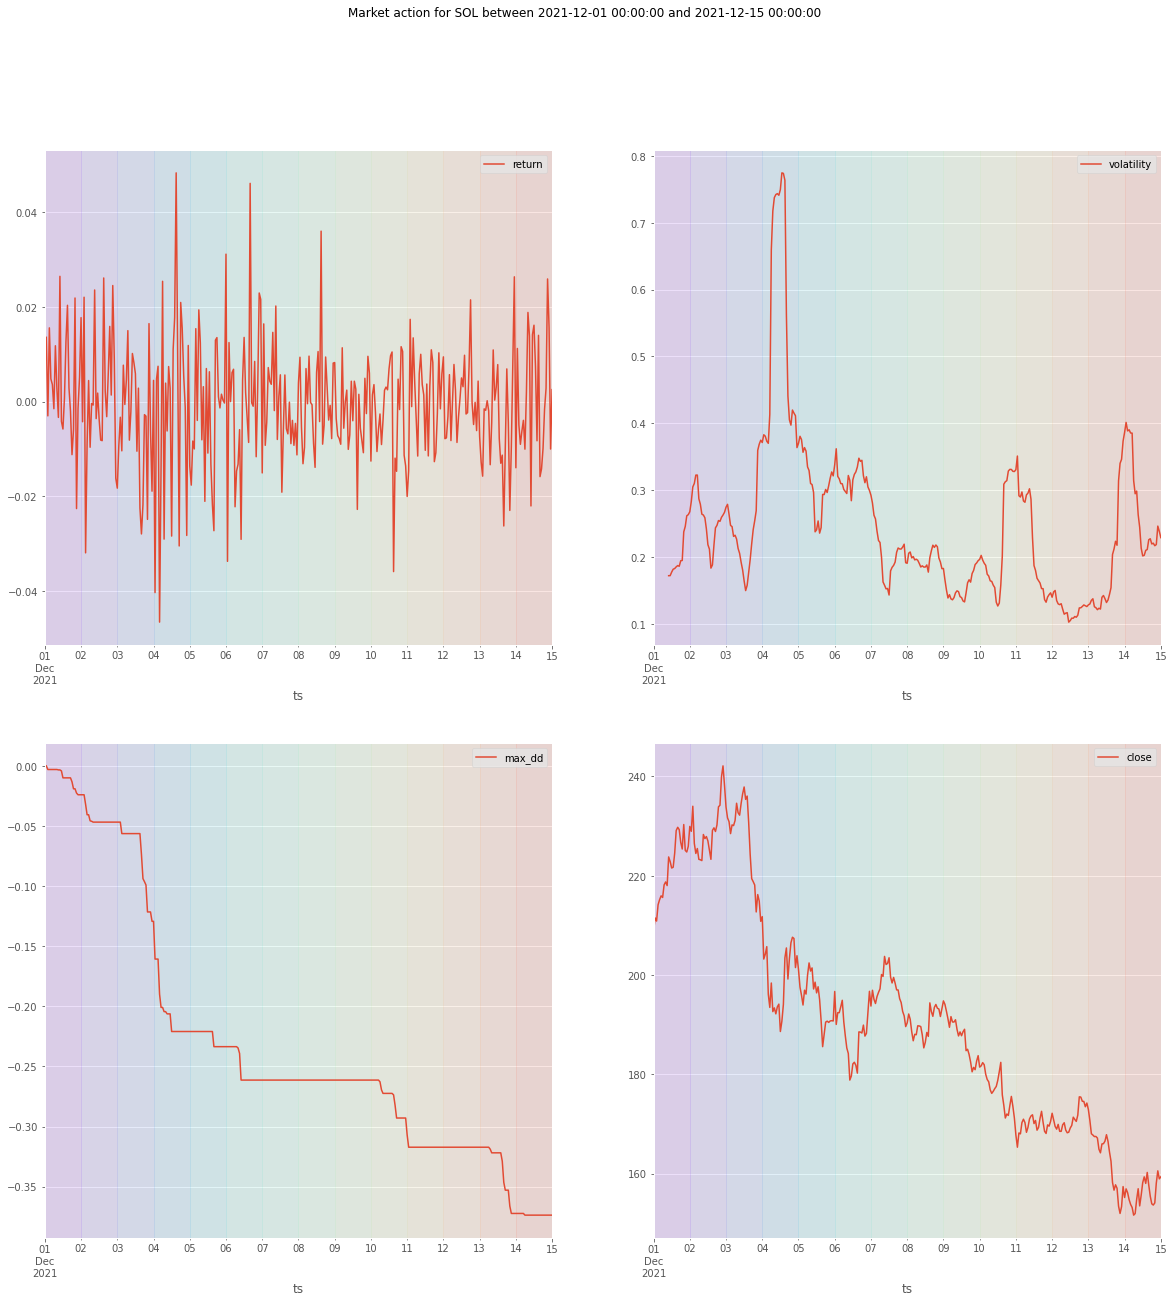

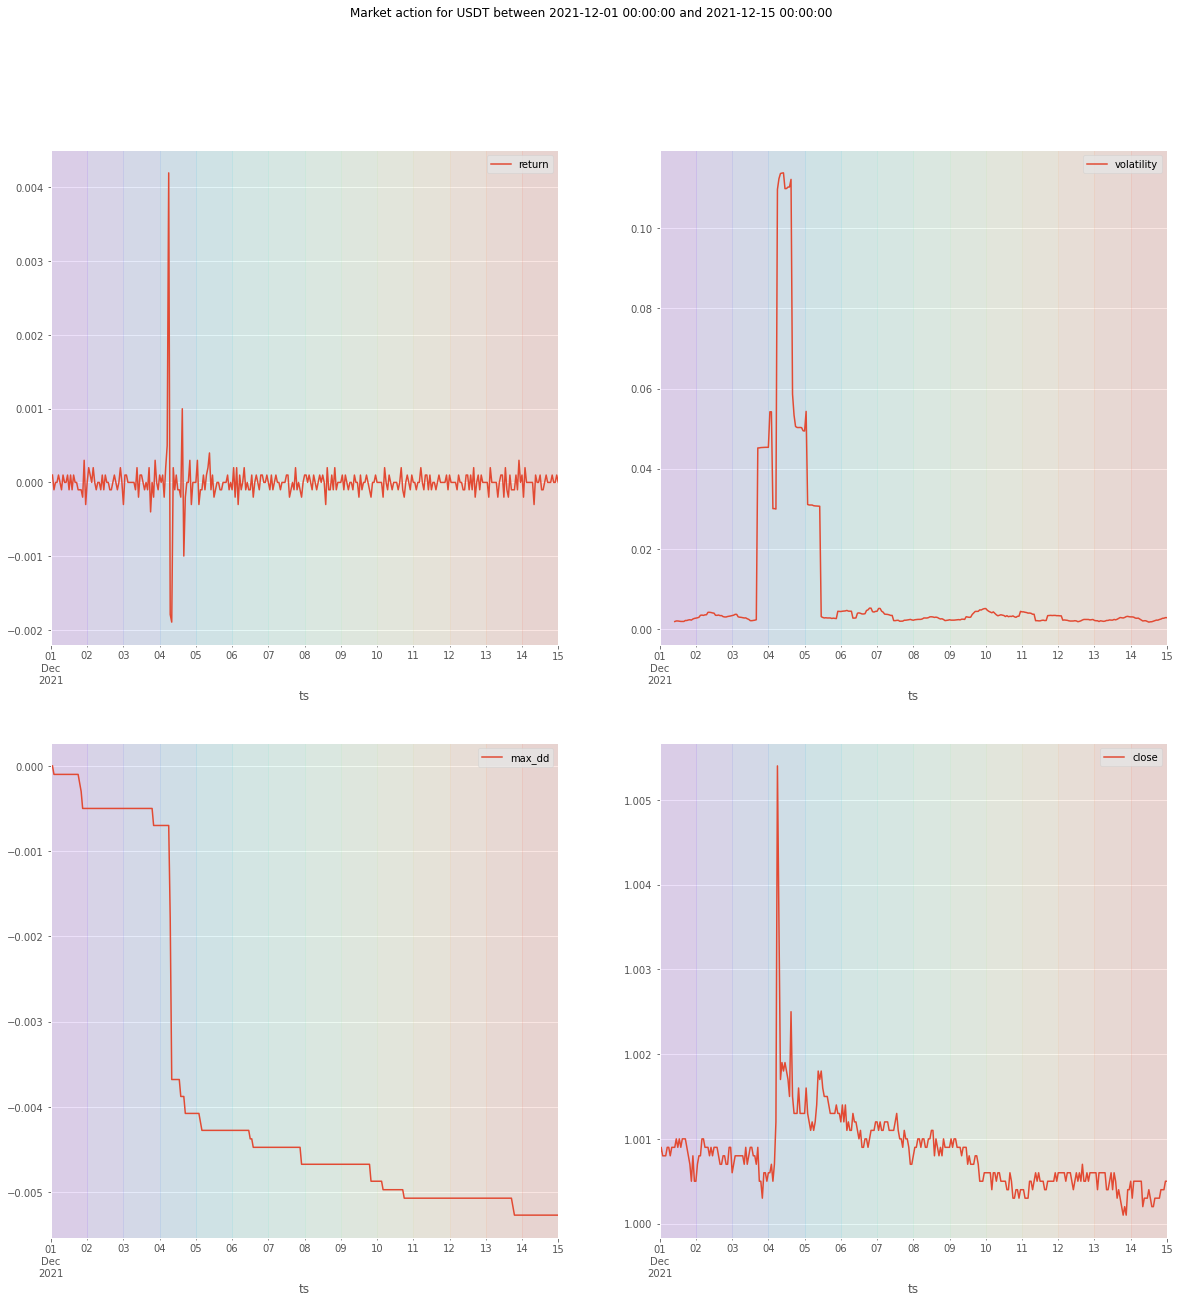

[None, None, None, None, None, None, None, None, None, None, None]

In [11]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]